In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [22]:
file_path = '/Users/aryellewright/Documents/Documents - Aryelle’s MacBook Air/Kumar-Biomaterials-Lab/CCK8-Transfection_Plots/20231211_CCK8-Transfection_DIPLibrary_reducedserum.xlsx'
sheet_name = 'combined' 
df = pd.read_excel(file_path, sheet_name=sheet_name)

/var/folders/dy/5pp8f0k5741b6sm60ch4xzhc0000gn/T/ipykernel_42448/2764910282.py:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(norm=normalize, cmap=colormap), label='TxV')


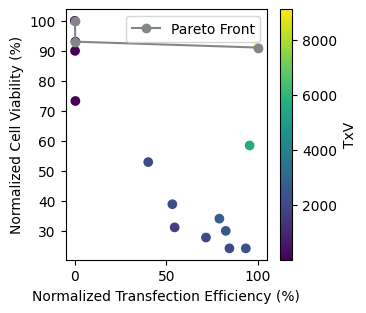

In [28]:
color_gray = "#818689"

df['Transfection'] = (df['Transfection'] / df['Transfection'].max()) * 100
df['TxV'] = df['Viability'] * df['Transfection']

colormap = plt.cm.viridis 
normalize = mcolors.Normalize(vmin=min(df['TxV']), vmax=max(df['TxV']))
plt.figure(figsize=(3.25, 3.25))
plt.scatter(df['Transfection'], df['Viability'], c=df['TxV'], cmap=colormap, norm=normalize, label='')
plt.colorbar(plt.cm.ScalarMappable(norm=normalize, cmap=colormap), label='TxV')

df_sorted = df.sort_values(['Transfection', 'Viability'], ascending=[False, False])
pareto_front_df = df_sorted.copy()
pareto_front_df['CumMax'] = pareto_front_df['Viability'].cummax()
pareto_front = pareto_front_df[pareto_front_df['Viability'] >= pareto_front_df['CumMax']]

plt.plot(pareto_front['Transfection'], pareto_front['Viability'], color=color_gray, marker='o', label='Pareto Front')

plt.xlabel('Normalized Transfection Efficiency (%)', size=10)
plt.ylabel('Normalized Cell Viability (%)', size=10)
plt.legend()

plt.show()